<a href="https://colab.research.google.com/github/sepehrnoory/EECS-700/blob/main/demos/EmbeddedML_L06_T1_3_Exploring_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T1.3.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---

### In the previous two tutorials we explored Regression (in particular Linear Regression). In this Colab Notebook, we will dive into Classification - dealing with categorical data!

We import the following libraries -

1.   [tensorflow](https://www.tensorflow.org/) - open source library to develop and train ML models
2.   [matplotlib](https://matplotlib.org/) - visualization of data in Python
3.   [numpy](https://numpy.org/) - scientific computing in Python

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# MNIST Dataset

We will work with an existing dataset in this Colab! The data that we will be working with is from the [MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist). The dataset contains 28x28 grayscale images of 10 handwritten digits (0 - 9). An ML Model trained on this dataset for the task of Image Classification should classify/categorize a new data sample into one of the 10 classes.





Let's import this dataset and visualize a few samples! Keras provides built-in toy datasets such as the MNIST Dataset. Read about the other bulit-in datasets [here.](https://keras.io/api/datasets/)

The `tf.keras.datasets.mnist` API instantiates the MNIST Dataset.

In [ ]:
data = tf.keras.datasets.mnist

In the below cell, the `data.load_data()` API is used to load the MNIST Dataset and unpack it to the training and testing data (X - input image, Y - output class label). Read more about this API [here.](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)

In [ ]:
(training_images, training_labels), (val_images, val_labels) = data.load_data()

---


**Question 1**: Why is it necessary to split the dataset into training and test sets?

**Answer:**

---

### We can now explore the loaded dataset and also visualize a few data samples (images and corresponding class labels)!

We see below that there are 60000 training images of size 28 x 28, 60000 corresponding class labels, 10000 test images of size 28 x 28, and 10000 corresponding class labels.

In [ ]:
print("Shape of training images:", training_images.shape)
print("Shape of training labels:", training_labels.shape)
print("Shape of testing images :", val_images.shape)
print("Shape of testing labels :", val_labels.shape)

Let's visualize the first training sample! If we print the image, we get a matrix!

In [ ]:
# Images are stored as matrices
print(training_images[0])
print()
print("Class:", training_labels[0])

Instead, we should plot the image using the matplotlib APIs! We use the `imshow()` API.

In [ ]:
# plot image
plt.imshow(training_images[0], cmap='gray')
print("Class:", training_labels[0])
print()

Take some time to experiment with different training samples! In the below cell, plot the 2nd training sample along with its label!

In [ ]:
# < YOUR CODE HERE >

### Normalizing Images

Before we train our model on the images, we must **preprocess our training and test images**!!

Neural Networks learn the best when the data is scaled/normalized to fall in a constant range. Practitioners often use the range [0,1]. How might you do this to the training and test images used here?

These images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format

In [ ]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

Let's print the normalized image matrix! We see that the pixel values are between 0 and 1.

In [ ]:
print(training_images[0])

# Simple neural network for MNIST

Now we are ready to define and train our ML Model.

How do we feed an image into the neural network as input? The input to the Neural Network is the flattened version of the Image Pixels, fed as a 1D tensor (as opposed to 2D tensor). Therefore, a 28 x 28 image will be fed as a 784-length 1D tensor. The `tf.keras.layers.Flatten()` API handles this.

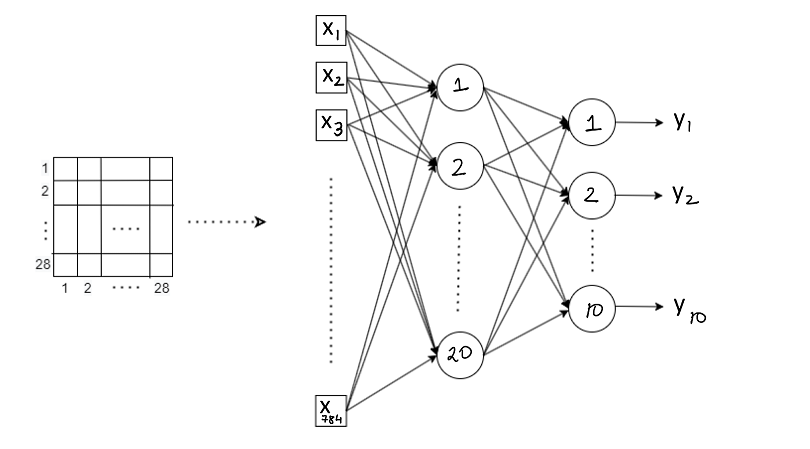

---


**Question 2**: How is an image fed as input to a Dense Layer of a Neural Network?

**Answer:**

---

---
**Question 3**: How many trainable parameters does the model has?

**Answer**:

---

### Define Model

We define the model to have 2 dense layers (excluding input layer), one with 20 neurons, and one with 10. The 10-neuron layer is our final layer because we have 10 classes that we want to classify to.

Recall **Activation Functions!** They are used to manipulate the output of a node (neuron). The first hidden layer has a ***ReLU Activation Function*** - the most popular Activation Function in Deep Learning. It alters the linear activation function by converting all negative values to 0.

The output layer has a ***Softmax Activation Function*** - used for multiclass classification tasks. It outputs a probability distribution across the multiple (here 10) classes. The class that has maximum probability is the resulting class label for that input data sample. These activation functions can be introduced by setting the activation flag in the dense layer API.

Finally, we stack all these layers using the `tf.keras.models.Sequential()` API.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(20, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Using `model.compile()` API we define the optimizer, loss function and metrics. For multiclass classification tasks, we move on from MSE Loss to **Crossentropy Loss**. Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. Cross-entropy builds upon the idea of information theory entropy and measures the difference between two probability distributions for a given random variable/set of events.

We also define the metric to be **accuracy** which gives a measure of how many samples we classified correctly.

In [ ]:
OPT = # < YOUR CODE HERE >
LOSS = # < YOUR CODE HERE >

model.compile(optimizer= OPT,
              loss= LOSS,
              metrics=['accuracy'])

***Hint:*** Use optimizer='adam', loss='sparse_categorical_crossentropy'

### Train Model

Finally, we train the model by fitting it to our training data for a fixed number of epochs. If you run the below cell, you will observe the *Training Loss* and *Accuracy* and *Validation Loss* and *Accuracy* for each epoch. Train this, and you should get an accuracy of about 96% - 98%.

In [ ]:
model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels))

## Examine the test data

Using the `model.evaluate()` API, you can get metrics for a test set. In this case we only have a training set and a validation set, so we can try it out with the validation set. The accuracy will be slightly lower, at maybe 96%.  This is because the model hasn't previously seen this data and may not be fully generalized for all data. It's still a pretty good score.

The model.evaluate API returns a loss value followed by the test accuracy.


In [ ]:
model.evaluate(val_images, val_labels)


In the above cell, we saw that the model.evaluate API gives us the accuracy of our model on the dataset. However, if we want to look at the predictions themselves, we use the `model.predict()` API. We can then manually compare these predictions against the ground truth labels.

In the below cell we explore the first i.e., [0] image in the validation set. According to the ground truth validation set labels, it is the number 7. When we observe the predictions/classifications, we see that the 7th neuron has a 9.9e-1 (99%+) probability, which is the highest, hence rightly predicting 7!

In [ ]:
classifications = model.predict(val_images)
print(classifications[0])
print("Predicted class: ", np.argmax(classifications[0]))    # returns index of maximum probability
print("The actual class: ", val_labels[0])

Let's visualize our model's prediction!

In [ ]:
# plot image
plt.imshow(val_images[0], cmap='gray')

---


**Question 4**: In this example, what does the `model.predict()` API return?

**Answer:**

---

# Modify NN to inspect learned parameter values

The below code is identical to that in the above section, except that the layers here are named prior to adding to the sequential API. This allows us to inspect their learned parameters later.

In [ ]:
# load data
data = tf.keras.datasets.mnist
(training_images, training_labels), (val_images, val_labels) = data.load_data()

# normalize images
training_images  = # < YOUR CODE HERE >
val_images = # < YOUR CODE HERE >

# define layers
layer_1 = tf.keras.layers.Dense(20, activation=tf.nn.relu)
layer_2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

# define model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    layer_1,
                                    layer_2])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
print("Training Model!")
model.fit(training_images, training_labels, epochs=20)

# evaluating model
print()
print("Evaluating Model")
model.evaluate(val_images, val_labels)

### Inspecting Layer 1 Parameters

If we print ***layer_1.get_weights()***, we'll see a lot of data. Let's unpack it.  First, there are 2 arrays in the result, the first representing the weights and the second representing the biases.

In [ ]:
print(layer_1.get_weights())

Let's look at the first array - weights! Let's look at its size.

In [ ]:
# weights
print(layer_1.get_weights()[0].size)

**The above code should print 15680.** Why?

Recall that there are 20 neurons in the first layer. Also, recall that the images are of size 28 x 28, therefore containing 784 pixels in total. If you multiply 784 x 20 you get 15680.

So this layer has 20 neurons, and each neuron learns a W parameter for each pixel. So instead of Y = wX + b, we have:


> a1_1 = w1X1 + w2X2 + w3X3 + .... + w784X784 + b



in every neuron! Every pixel has a weight in every neuron. Those weights are multiplied by the pixel value, summed up, and given a bias.

**Note**: a1_1 represents output of neuron 1 in layer 1.

Let's look at the second array - biases! Let's look at its size.

In [ ]:
# bias
print(layer_1.get_weights()[1].size)

The above code should print 20 -- the ***get_weights()[1]*** contains the biases for each of the 20 neurons in this layer.

### Inspecting Layer 2 Parameters

Now let's look at layer 2. Printing the `layer.get_weights()` API will give us 2 arrays again, the first a list of weights for the 10 neurons, and the second a list of biases for the 10 neurons

Let's first look at the weights:

In [ ]:
# weights
print(layer_2.get_weights()[0].size)

This should return 200. Again, consider why?

There are 10 neurons in this layer, but there are 20 neurons in the previous layer. So, each neuron in this layer will learn a weight for the incoming value from the previous layer. So, for example, the if the first neuron in this (second) layer is N2_1, and the neurons output from the previous layers are N1_1 - N1_20, then this neuron will have 20 weights (w1 - w20) and it will calculate its output to be:



> w1N1_1 + w2N1_2 + w3N1_3 + ... + w20N1_20 + b


So each of these weights will be learned as will the bias, for every neuron.

**Note** : N1_1 refers to Layer 1 Neuron 1; N1_20 refers to Layer 1 Neuron 20.


In [ ]:
# bias
print(layer_2.get_weights()[1].size)

...and as expected there are 10 elements in this array, representing the 10 biases for the 10 neurons.

Hopefully this helps you see how the element of a simple neuron containing Y = wX + b can be expanded greatly into a deep neural network, and that DNNs can learn the parameters that match the 784 pixels of an image to their output!

---


**Question 5**: In layer 2, why are there 200 weights and 10 bias values?

**Answer:**

---

Inspect the summary of the model.

In [ ]:
model.summary()